In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mltools import plot_data, plot_frontiere, make_grid, gen_arti
from tqdm import tqdm

In [2]:
def mse(w,x,y):
	return np.mean((x@w - y)**2)

def mse_grad(w,x,y):
	return 2 * np.mean(x.T @ x @ w - x.T @ y)

def reglog(w,x,y):
    return np.mean(np.log(1 + np.exp(-y * (x @ w))))

def reglog_grad(w,x,y):
    return np.mean(1 / (1+np.exp(-y*(x@w))) * (-y*x) * np.exp(-y * (x@w)), axis=0).reshape(-1,1)

def perceptron_loss(w,x,y):
	return np.maximum(0, -y.reshape((-1,1)) * (x @ w))

def perceptron_grad(w,x,y):
	return np.where(perceptron_loss(w,x,y) <= 0, 0, -x * y.reshape((-1,1)))

class Lineaire():
	def __init__(self,loss=perceptron_loss,loss_g=perceptron_grad,max_iter=100,eps=0.01):
		np.random.seed(1)
		self.max_iter, self.eps = max_iter,eps
		self.w = None
		self.loss, self.loss_g = loss, loss_g
		
	def fit(self,datax,datay):
		self.w = np.random.randn(datax.shape[1], 1)
		all_w = []
		all_l = []
		for _ in range(self.max_iter):
			self.w -= self.eps * np.mean(self.loss_g(self.w,datax,datay), axis = 0).reshape((-1,1))
			all_l.append(np.mean(self.loss(self.w,datax,datay)))
			all_w.append(self.w)
		return self.w, np.array(all_w), np.array(all_l)

	def predict(self,datax):
		return np.sign(datax@self.w)

	def score(self,datax,datay):
		return np.mean(np.where(self.predict(datax) - datay == 0, 1, 0))

In [3]:
datax, datay = gen_arti(epsilon=0.1, data_type=0)
grid, x_grid, y_grid = make_grid(xmin=-2, xmax=2, ymin=-2, ymax=2, step=100)

def descente_gradient(x, y, f_loss, f_grad, eps, n_iter):
	list_w = []
	list_l = []
	w = np.random.randn(datax.shape[1], 1)
	for _ in tqdm(range(n_iter)):
		w = w - eps * f_grad(w, x, y)
		list_w.append(w)
		list_l.append(f_loss(w, x, y))
	return list_w, list_l, w

def descente_gradient_stoch(x, y, f_loss, f_grad, eps, n_iter):
	list_w = []
	list_l = []
	n = x.shape[0]
	w = np.random.randn(datax.shape[1], 1)
	for _ in tqdm(range(n_iter)):
		for _ in range(n):
			rand_idx = np.random.randint(n)
			w = w - eps * f_grad(w, x[rand_idx], y[rand_idx])
		list_w.append(w)
		list_l.append(f_loss(w, x, y))
	return list_w, list_l, w

def descente_gradient_minibatch(x, y, f_loss, f_grad, eps, n_iter):
	list_w = []
	list_l = []
	n = x.shape[0]
	w = np.random.randn(x.shape[1], 1)
	n_batch = 20
	batch_size = n//n_batch
	for _ in tqdm(range(n_iter)):
		for _ in range(n_batch):
			rand_idx = np.random.randint(1, n_batch-1)
			w = w - eps * f_grad(w, x[rand_idx*batch_size:rand_idx*(batch_size+1)], y[rand_idx*batch_size:rand_idx*(batch_size+1)])
		list_w.append(w)
		list_l.append(f_loss(w, x, y))
	return list_w, list_l, w

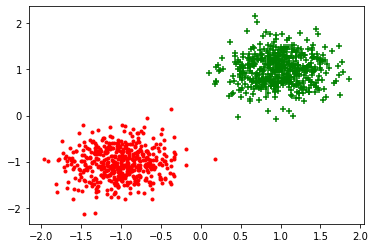

In [8]:
plt.figure()
plot_data(datax,datay)

0.971


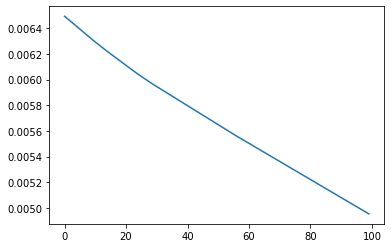

In [5]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay)
score = model.score(datax,datay)
print(score)
plt.plot(loss_tab)
plt.show()

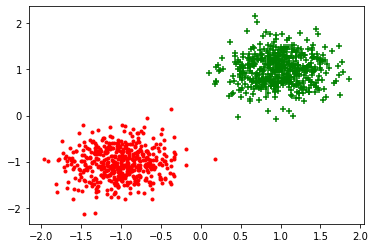

In [10]:
plt.figure()
plot_data(datax,datay)

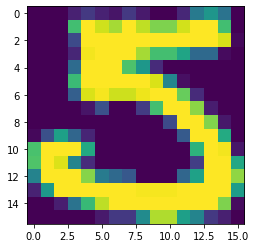

In [11]:
def load_usps(fn):
	with open(fn,"r") as f:
		f.readline()
		data = [[float(x) for x in l.split()] for l in f if len(l.split())>2]
	tmp=np.array(data)
	return tmp[:,1:],tmp[:,0].astype(int)

def get_usps(l,datax,datay):
	if type(l)!=list:
		resx = datax[datay==l,:]
		resy = datay[datay==l]
		return resx,resy
	tmp =   list(zip(*[get_usps(i,datax,datay) for i in l]))
	tmpx,tmpy = np.vstack(tmp[0]),np.hstack(tmp[1])
	return tmpx,tmpy

def show_usps(data):
	plt.imshow(data.reshape((16,16)),interpolation="nearest",cmap="viridis")

uspsdatatrain = "data/USPS_train.txt"
uspsdatatest = "data/USPS_test.txt"
alltrainx,alltrainy = load_usps(uspsdatatrain)
alltestx,alltesty = load_usps(uspsdatatest)

def get_two_classes(neg, pos):
	datax,datay = get_usps([neg,pos],alltrainx,alltrainy)
	testx,testy = get_usps([neg,pos],alltestx,alltesty)
	datay = np.where(datay == neg, -1, 1)
	testy = np.where(testy == neg, -1, 1)
	return datax, datay, testx, testy

datax,datay,testx,testy = get_two_classes(5, 6)
show_usps(datax[0])

In [12]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay)
score = model.score(testx, testy)
score

0.5034894398530763

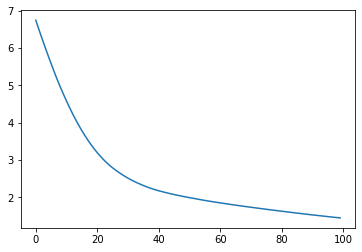

In [13]:
plt.plot(loss_tab)
plt.show()

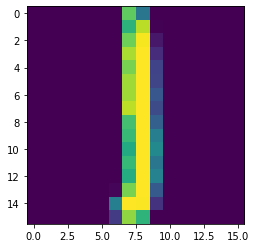

In [14]:
datax,datay,testx,testy = get_two_classes(1, 0)
show_usps(datax[0])

In [15]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay)
score = model.score(testx, testy)
score

0.5126053451300985

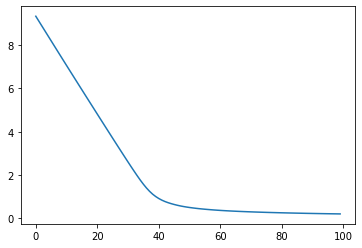

In [16]:
plt.plot(loss_tab)
plt.show()

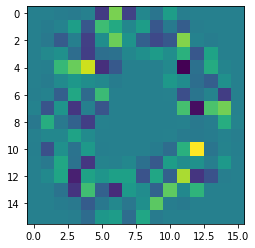

In [17]:
show_usps(datax[2000,:].reshape((-1,1)) * best_w)

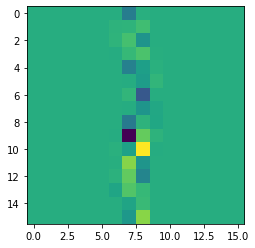

In [18]:
show_usps(datax[2,:].reshape((-1,1)) * best_w)

In [19]:
class Lineaire():
	def __init__(self,loss=perceptron_loss,loss_g=perceptron_grad,max_iter=100,eps=0.01):
		np.random.seed(2)
		self.max_iter, self.eps = max_iter,eps
		self.w = None
		self.loss, self.loss_g = loss, loss_g
		
	def fit(self,datax,datay):
		self.w = np.random.randn(datax.shape[1], 1)
		all_w = []
		all_l = []
		for _ in range(self.max_iter):
			self.w -= self.eps * np.mean(self.loss_g(self.w,datax,datay), axis = 0).reshape((-1,1))
			all_l.append(np.mean(self.loss(self.w,datax,datay)))
			all_w.append(self.w)
		return self.w, np.array(all_w), np.array(all_l)

	def fit_stoch(self, datax, datay):
		self.w = np.random.randn(datax.shape[1], 1)
		all_w = []
		all_l = []
		all_idx = np.arange(datax.shape[0])
		for _ in range(self.max_iter):
			np.random.shuffle(all_idx)
			for i in all_idx:
				xi, yi = datax[i], datay[i]
				if yi * (np.dot(self.w.reshape(-1), xi)) < 0:
					self.w += self.eps * yi * xi.reshape((-1,1))
			all_l.append(np.mean(self.loss(self.w,datax,datay)))
			all_w.append(self.w)
		return self.w, np.array(all_w), np.array(all_l)

	def fit_mini_batch(self, datax, datay, n_batch=20):
		self.w = np.random.randn(datax.shape[1], 1)
		all_w = []
		all_l = []
		batch_size = datax.shape[0] // n_batch
		for _ in range(self.max_iter):
			for _ in range(n_batch):
				i = np.random.randint(1, n_batch - 1)
				start, end = i * batch_size, (i + 1) * batch_size
				x, y = datax[start:end], datay[start:end]
				self.w -= self.eps * np.mean(self.loss_g(self.w,x,y), axis = 0).reshape((-1,1))
			all_l.append(np.mean(self.loss(self.w,datax,datay)))
			all_w.append(self.w)
		return self.w, np.array(all_w), np.array(all_l)

	def predict(self,datax):
		return np.sign(datax@self.w)

	def score(self,datax,datay):
		return np.mean(np.where(self.predict(datax) - datay == 0, 1, 0))

0.5036544578429858


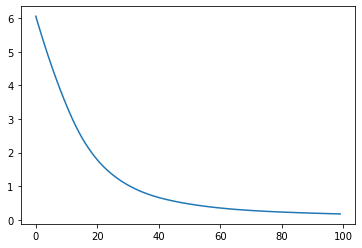

0.5036544578429858


In [20]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit(datax,datay)
score = model.score(datax,datay)
print(score)
plt.plot(loss_tab)
plt.show()
print(model.score(datax, datay))

0.503693542953606


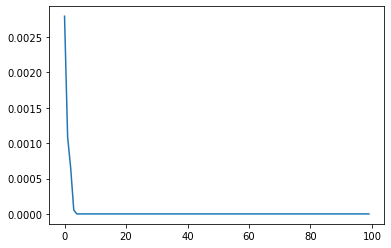

0.503693542953606


In [21]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit_stoch(datax,datay)
score = model.score(datax,datay)
print(score)
plt.plot(loss_tab)
plt.show()
print(model.score(datax, datay))

0.5036153727323657


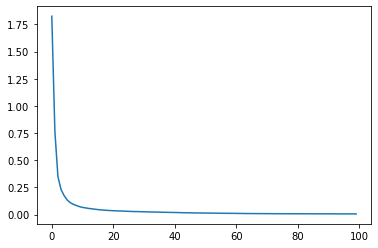

0.5036153727323657


In [22]:
model = Lineaire()
best_w, w_tab, loss_tab = model.fit_mini_batch(datax,datay)
score = model.score(datax,datay)
print(score)
plt.plot(loss_tab)
plt.show()
print(model.score(datax, datay))

In [28]:
from itertools import combinations

def proj_biais(datax):
	return np.hstack((np.ones((datax.shape[0], 1)), datax))

def proj_poly(datax):
	d = datax.shape[1]
	combi = np.zeros((datax.shape[0], d * (d-1) // 2))
	for i, (j, k) in enumerate(combinations(range(d), 2)):
		combi[:,i] = datax[:,j] * datax[:,k]
	return np.hstack((proj_biais(datax), combi, datax ** 2))

def proj_gauss(datax, base, sigma):
	proj = np.zeros((datax.shape[0], base.shape[0]))
	for i in range(proj.shape[1]):
		proj[:,i] = 1/np.exp(np.linalg.norm(datax - base[i], axis=1)**2 / 2 / sigma)
	return proj

In [29]:
def hinge_loss(w,x,y,a,l):
	return np.maximum(0, a - y.reshape((-1,1)) * (x @ w)) + l * np.linalg.norm(w)**2

def hinge_loss_grad(w,x,y,a,l):
	return np.where(y.reshape((-1,1)) * (x @ w) >= 1, 0, -x * y.reshape((-1,1)))